# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [12]:
def apply_svd_custom(X_train, X_test, n_components):
    mean = np.mean(X_train, axis=0)
    X_train_centered = X_train - mean
    X_test_centered = X_test - mean 

    covariance_matrix = np.dot(X_train_centered.T, X_train_centered) / X_train_centered.shape[0]

    eigvals, eigvecs = np.linalg.eigh(covariance_matrix)

    sorted_indices = np.argsort(eigvals)[::-1]
    eigvals = eigvals[sorted_indices]
    eigvecs = eigvecs[:, sorted_indices]

    principal_components = eigvecs[:, :n_components]

    X_train_reduced = np.dot(X_train_centered, principal_components)
    X_test_reduced = np.dot(X_test_centered, principal_components)

    return X_train_reduced, X_test_reduced, principal_components

## Part 3: Train Logistic Regression and Measure Performance

In [13]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')
    
    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [14]:
svd_components = [784, 500, 300, 100, 50, 20]  # You need to decide what number to search...

# Store the results
results = []

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")
    
    # Apply SVD to the training and test sets
    # Call apply_svd_custom() here...
    X_train_svd, X_test_svd, V = apply_svd_custom(X_train, X_test, n_components)
    
    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)
    results.append((n_components, accuracy, training_time))
        
    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")


Training models with different levels of SVD preprocessing...
Applying custom SVD with 784 components...


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 784, Accuracy: 0.9207, Training time: 269.0747 seconds
Applying custom SVD with 500 components...


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 500, Accuracy: 0.9205, Training time: 147.0185 seconds
Applying custom SVD with 300 components...


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 300, Accuracy: 0.9206, Training time: 66.3460 seconds
Applying custom SVD with 100 components...


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 100, Accuracy: 0.9181, Training time: 15.5643 seconds
Applying custom SVD with 50 components...


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 50, Accuracy: 0.9080, Training time: 4.5082 seconds
Applying custom SVD with 20 components...


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 20, Accuracy: 0.8784, Training time: 0.8082 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


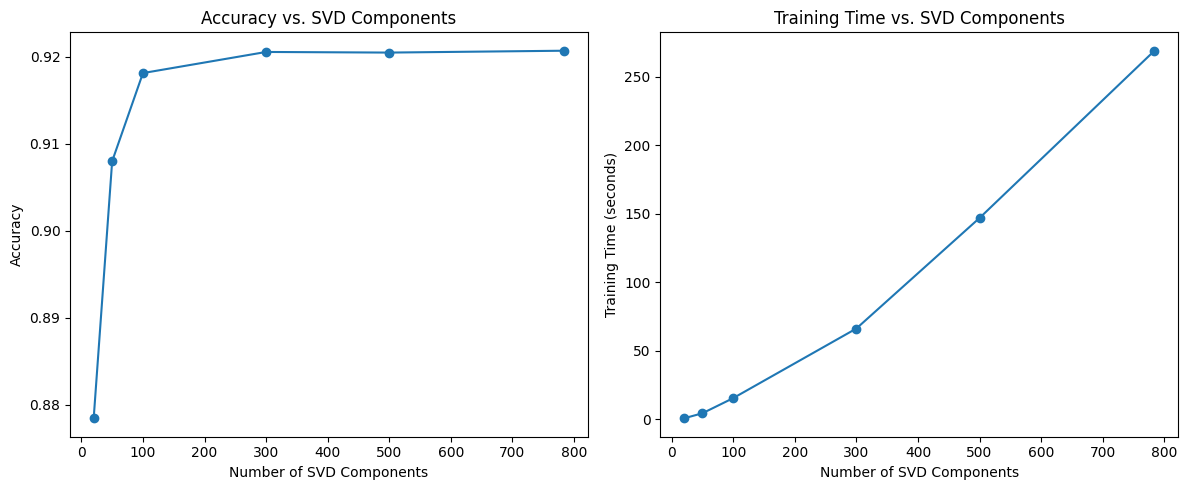

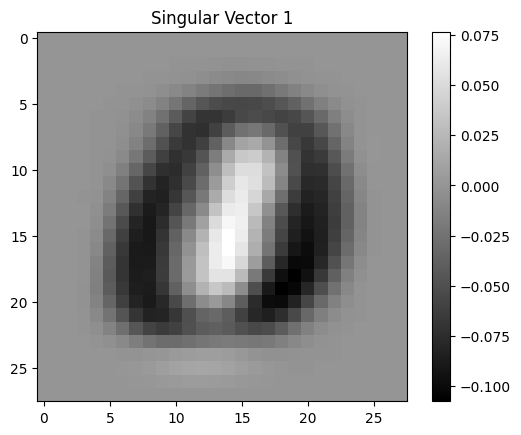

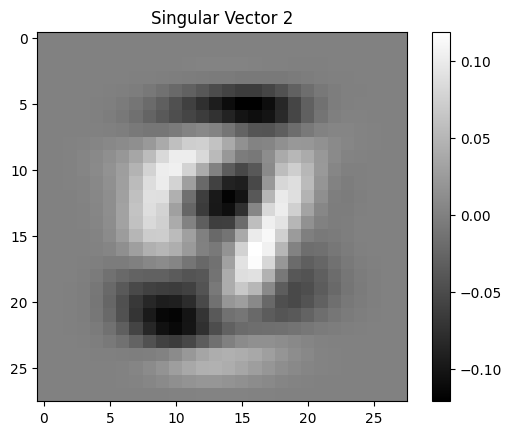

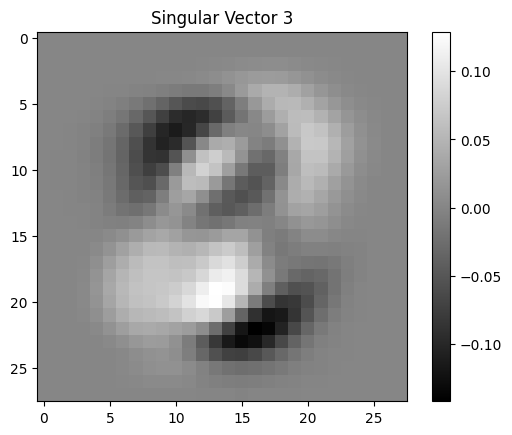

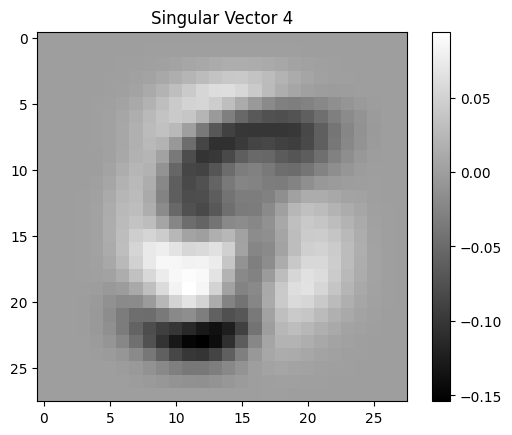

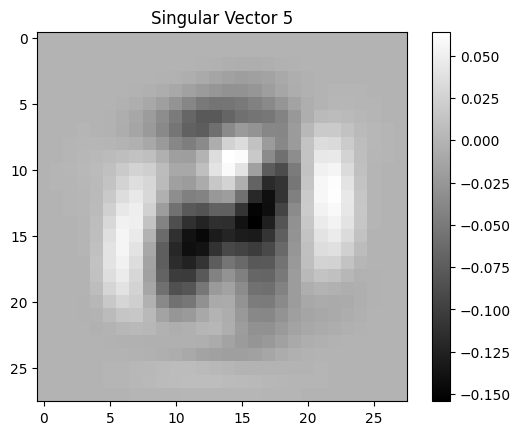

In [15]:
## Your implementation here...
## You may add necessary lines in Part 4 to access data for visualization
def visualize_results(results, V, top_k_singular_vectors=5):
    components, accuracies, times = zip(*results)

    # Plot accuracy vs. number of components
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(components, accuracies, marker='o')
    plt.title('Accuracy vs. SVD Components')
    plt.xlabel('Number of SVD Components')
    plt.ylabel('Accuracy')
    
    # Plot training time vs. number of components
    plt.subplot(1, 2, 2)
    plt.plot(components, times, marker='o')
    plt.title('Training Time vs. SVD Components')
    plt.xlabel('Number of SVD Components')
    plt.ylabel('Training Time (seconds)')
    
    plt.tight_layout()
    plt.show()
    
    # Visualize the top k singular vectors as images (reshape to 28x28)
    for i in range(top_k_singular_vectors):
        singular_vector = V[:, i].reshape(28, 28)
        plt.imshow(singular_vector, cmap='gray')
        plt.title(f'Singular Vector {i+1}')
        plt.colorbar()
        plt.show()

# Call this function after running your SVD and training models
visualize_results(results, V)

## Part 6: Analyze / Conclusion 

YOUR ANSWER: 

Based on our data, we see that as we increase the number of SVD components, both accuracy and training time increases. The accuracy starts to stay the same after 100 SVD components, around 0.91 accuracy, only  changing less than than 0.01 meaning it would be more optimal choosing about 100 SVD components which would give us similar accuracy to that of max SVD components, but needing less training time, around 15 seconds compared to 269.

The top 5 singular vectors capture patterns in the MNIST dataset. Singular vector 1 resembles a 0 and singular vector 3 resembles a number 3. The other 3 vectors are harder to make out, but also seem to be numbers. These singular vectors represent the most significant directions of variance in the dataset, helping the model distinguish between different digits.

Therefore, while increasing the number of SVD components allows the model to capture more variance in the data, the most crucial information is contained in the first 100 components. The first few singular vectors alone reveal important global features, making 100 components an efficient and optimal choice for both accuracy and computational cost.